# Guassian Regressor (FINE TUNING NEEDED)

## imports

In [1]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C 
import numpy as np
import itertools
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../lib")))

from model_helper import load_and_format_data, test_and_eval, format_for_model

## constants

In [2]:
GARAGES = ["North Garage", "West Garage", "South Garage"]

# choose dates used in dataset name
DATE_START = "2025-02-13"
DATE_END = "2025-04-14"

## perform experiment on entire normalized dataset

### load data

In [3]:
# garage used as key with each one assigned a tuple representing the (x_data, y_data)
garage_data = {}

for garage in GARAGES:
    garage_data[garage] = load_and_format_data(garage, DATE_START, DATE_END)

### train model

In [4]:
# Define kernel parameters (similar to initial_guess)
kernel_params = {
    'constant_value': 1.0,
    'constant_bounds': (1e-3, 1e3),
    'length_scale': 10,
    'length_scale_bounds': (1e-2, 1e2)
}

# keys are each garage with value being params or list of weights made
garage_models = {}
for garage in garage_data.keys():
    flat_x_data = list(itertools.chain.from_iterable(garage_data[garage][0]))
    flat_y_data = list(itertools.chain.from_iterable(garage_data[garage][1]))
    # create kernel and fit
    kernel = C(kernel_params['constant_value'], kernel_params['constant_bounds']) * RBF(kernel_params['length_scale'], kernel_params['length_scale_bounds'])
    model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-2)
    model.fit(format_for_model(flat_x_data), format_for_model(flat_y_data))
    garage_models[garage] = model

/Users/fardinhaque/Downloads/Coding_Projects/ParkPredict/ParkPredict_Experiments/venv/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/fardinhaque/Downloads/Coding_Projects/ParkPredict/ParkPredict_Experiments/venv/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/fardinhaque/Downloads/Coding_Projects/ParkPredict/ParkPredict_Experiments/venv/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_

### inference plot and eval

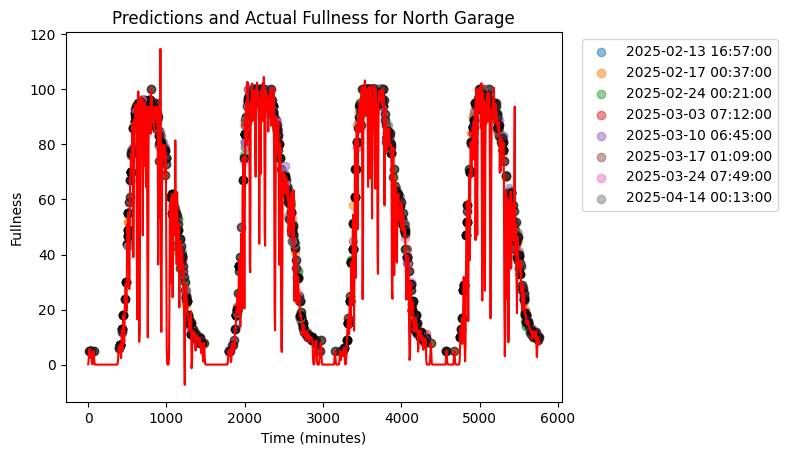

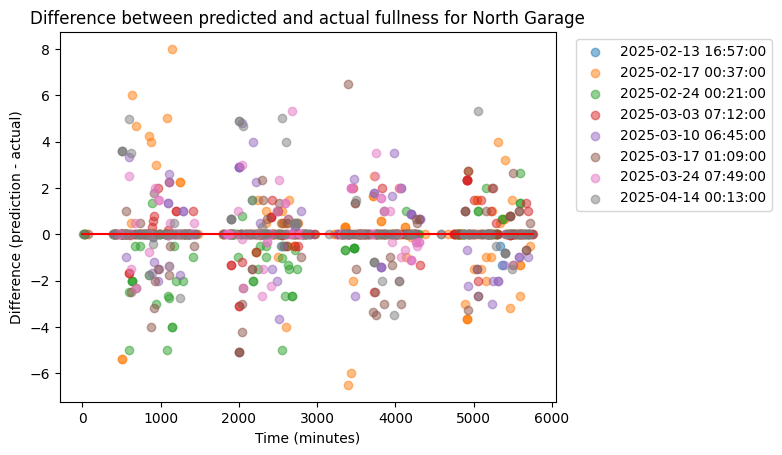

North Garage stats
r^2: 0.9983964838979502
rmse: 0.6506060105863436
mae: 1.3376924628168512




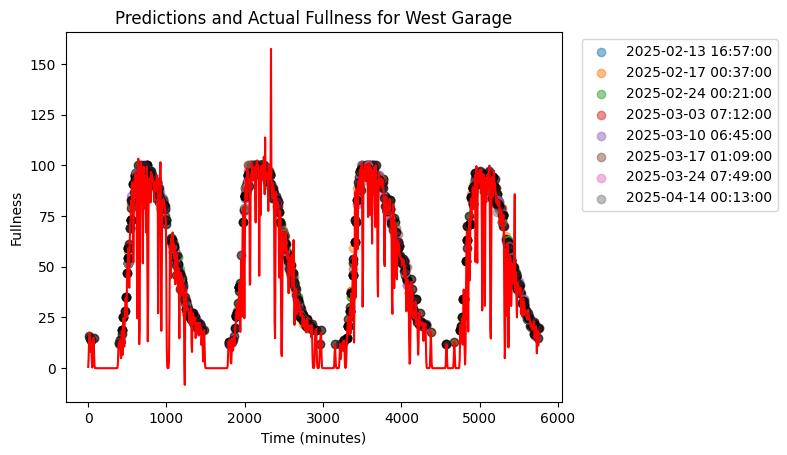

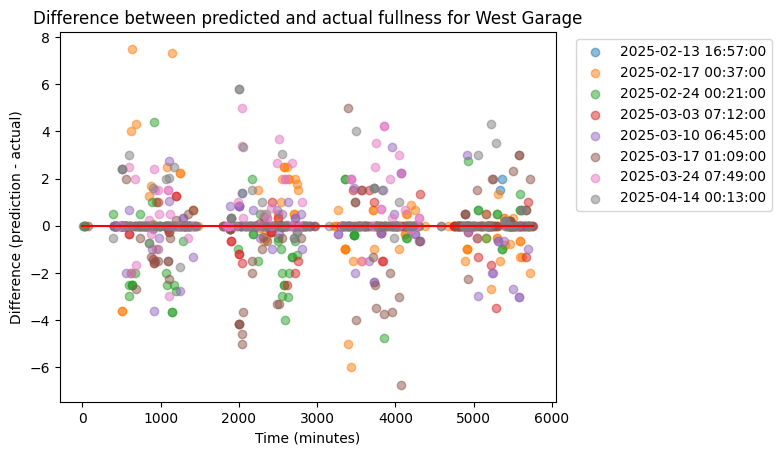

West Garage stats
r^2: 0.9982036707961536
rmse: 0.5895197189379509
mae: 1.2411271705398272




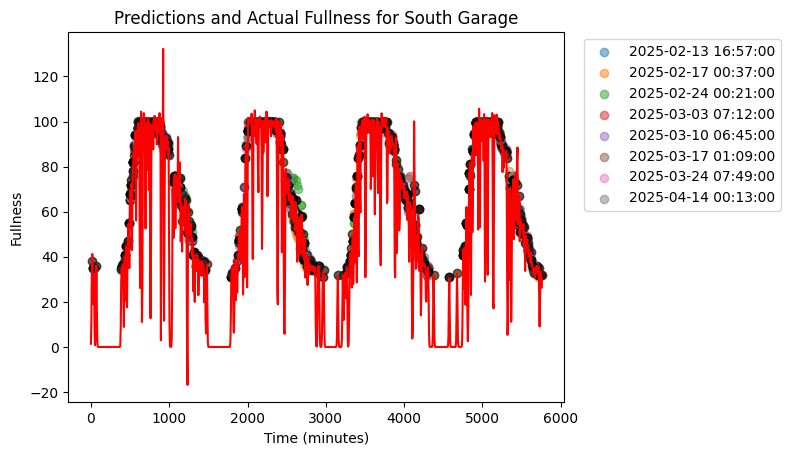

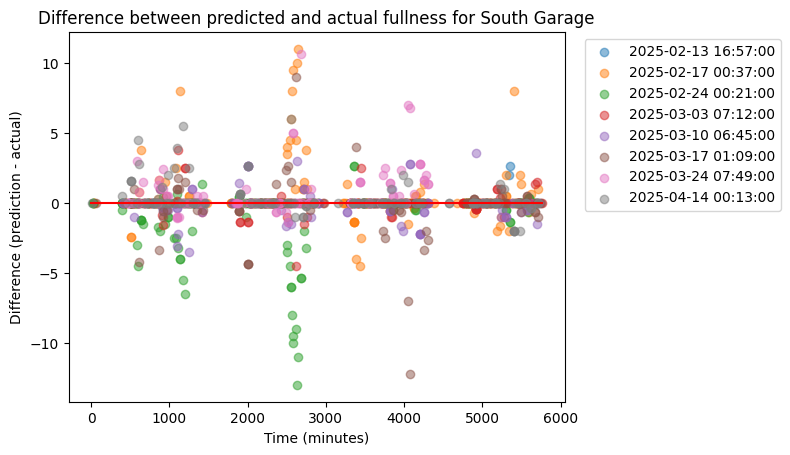

South Garage stats
r^2: 0.9951217144909877
rmse: 0.6639891364455079
mae: 1.7078200463244608




In [5]:
for garage in garage_models:
    formatted_x_data = [format_for_model(s.to_list()) for s in garage_data[garage][0]]
    test_and_eval(garage, garage_data[garage][2], formatted_x_data, garage_data[garage][1], garage_models[garage].predict)



## partitioned experiment

### load data

In [6]:
garage_training_data = {}

for garage in GARAGES:
    garage_training_data[garage] = load_and_format_data(garage, DATE_START, DATE_END, "d_starting", "training")

### train model

In [7]:
# keys are each garage with value being params or list of weights made
garage_models = {}
for garage in garage_training_data.keys():
    flat_x_data = list(itertools.chain.from_iterable(garage_training_data[garage][0]))
    flat_y_data = list(itertools.chain.from_iterable(garage_training_data[garage][1]))
    kernel = C(kernel_params['constant_value'], kernel_params['constant_bounds']) * RBF(kernel_params['length_scale'], kernel_params['length_scale_bounds'])
    model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-2)
    model.fit(format_for_model(flat_x_data), format_for_model(flat_y_data))
    garage_models[garage] = model

/Users/fardinhaque/Downloads/Coding_Projects/ParkPredict/ParkPredict_Experiments/venv/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/fardinhaque/Downloads/Coding_Projects/ParkPredict/ParkPredict_Experiments/venv/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/fardinhaque/Downloads/Coding_Projects/ParkPredict/ParkPredict_Experiments/venv/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_

### inference, plot, and stats

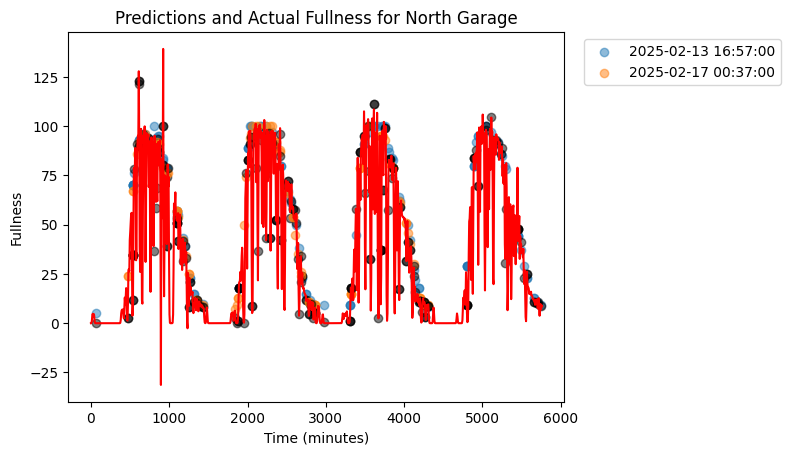

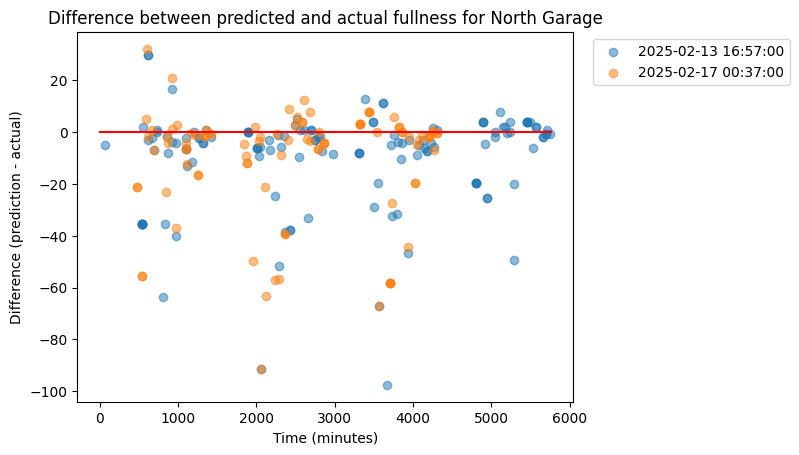

North Garage stats
r^2: 0.5545729213816393
rmse: 13.313840512679025
mae: 22.85983120345669




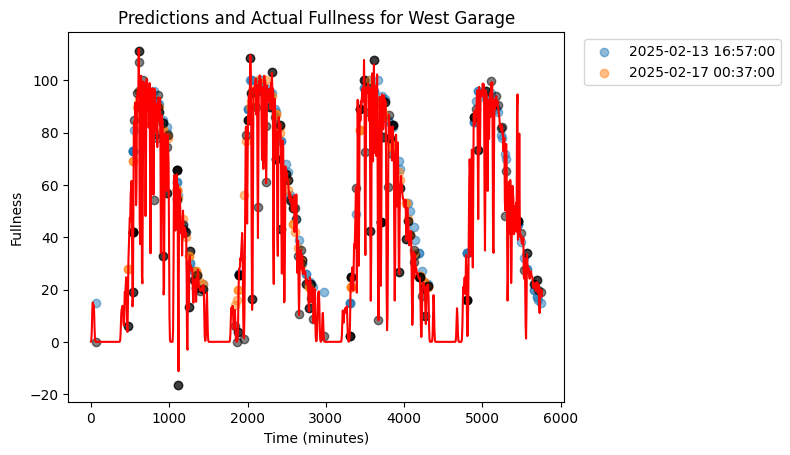

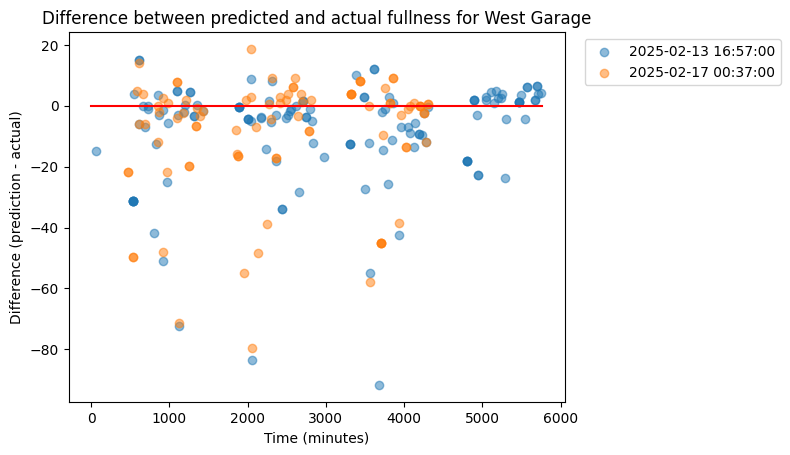

West Garage stats
r^2: 0.5285610536227896
rmse: 12.048887693137145
mae: 20.289835048907605




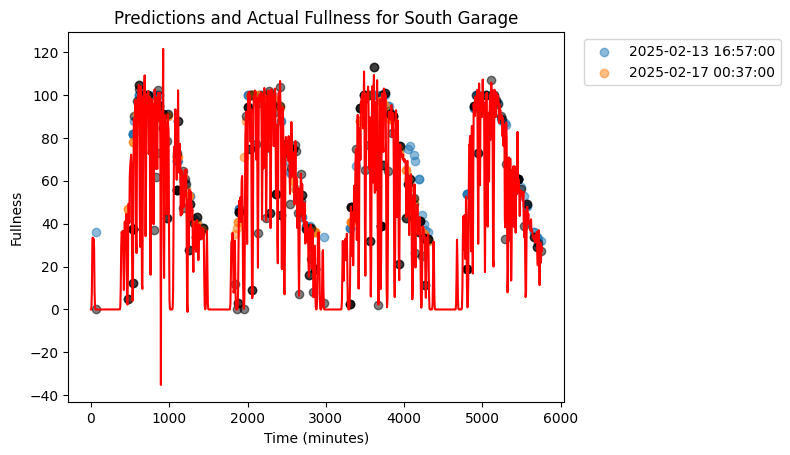

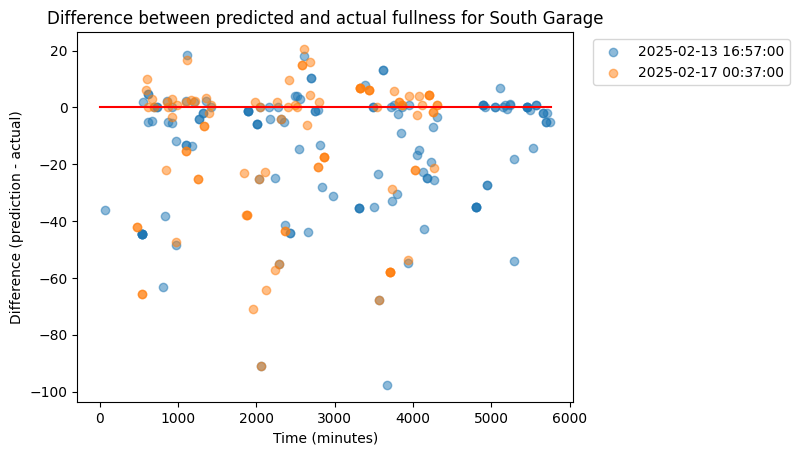

South Garage stats
r^2: -0.16115605098649244
rmse: 17.01273192037742
mae: 26.629077558717515




In [8]:
for garage in garage_models:
    x_data, y_data, start_dates = load_and_format_data(garage, DATE_START, DATE_END, "d_starting", "test")
    formatted_x_data = [format_for_model(s.to_list()) for s in x_data]
    test_and_eval(garage, garage_data[garage][2], formatted_x_data, y_data, garage_models[garage].predict)

